# Emoji Prediction

## Team Members:
    -Akshat Maheshwari (20161024)
    -Kalpit Pokra (20161134)
    -Kushagra Nagori (20161032)
    -Kartik Garg (20161219)
    
In this part of the project, we have used the word vector representations to build the emoji predictor.

The dataset we have used for this part is: [Link](https://github.com/acashmkj/twitter-sentiment-analysis/tree/master/data)

Along with that, we have used the CLDR codes of the emojis and the emoji python library to print the emoji.

In [1]:
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/tess.csv')

In [3]:
maxLen = len(max(X_train, key=len).split())

In [4]:
index = 2
print(X_train[index], label_to_emoji(Y_train[index]))

It is the worst day in my life 😞


In this part, we are converting the training and testing labels into One-Hot Vectors, so that it is suitable for training the models.

In [5]:
# 24 is used, since we have 24 kinds of emojis in the emoji dictionary.

Y_oh_train = convert_to_one_hot(Y_train, C = 24)
Y_oh_test = convert_to_one_hot(Y_test, C = 24)

In [6]:
index = 50
print(Y_train[index], "is converted into one hot", Y_oh_train[index])

0 is converted into one hot [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The first step is to convert an input sentence into the word vector representation, which then get averaged together. We will use the 50-dimensional GloVe embeddings ([Link](https://nlp.stanford.edu/projects/glove/)).

In [7]:
word_to_index, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

- `word_to_index`: dictionary mapping from words to their indices in the vocabulary (400,001 words, with the valid indices ranging from 0 to 400,000)
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

In [8]:
def sentence_to_avg(sentence, word_to_vec_map):
    words = [word.lower() for word in sentence.split(' ') if word != '']

    avg = np.zeros(word_to_vec_map["cucumber"].shape)
    
    for w in words:
        if w in word_to_vec_map:
            avg += word_to_vec_map[w]
    avg = avg / float(len(words))
    
    return avg

In [9]:
avg = sentence_to_avg("I am a computer science student", word_to_vec_map)
print("avg = ", avg)

avg =  [-0.152426    0.36657333  0.25175683 -0.20969533  0.47594378 -0.25841217
 -0.378095   -0.40567833 -0.37233333  0.1440341   0.04078167 -0.00905833
 -0.418224    0.16384267  0.44825333  0.03722667 -0.28598     0.77520833
 -0.26075567  0.02292833  0.26706017  0.64319333  0.10002667  0.39073167
  0.66011667 -1.84776667 -0.58223    -0.32355167  0.01468667 -0.19120767
  3.09491667 -0.11282833 -0.42566167 -0.58604833 -0.168337   -0.01603667
  0.12241     0.47339833  0.53444333 -0.19619633  0.17200412 -0.1731205
 -0.1347615   0.55248033  0.08167183  0.10617     0.30711833  0.077814
  0.06971373  0.56611667]


In [10]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 1000):
    train_len, num_classes, glove_dims = Y.shape[0], 24, 50
    
    W = np.random.randn(num_classes, glove_dims) / np.sqrt(glove_dims)
    b = np.zeros((num_classes,))
    
    Y_oh = convert_to_one_hot(Y, C = num_classes)
    
    for t in range(num_iterations):
        for i in range(train_len):            
            avg = sentence_to_avg(X[i], word_to_vec_map)

            a = softmax(np.dot(W, avg) + b)

            cost = -np.squeeze(np.sum(Y_oh[i] * np.log(a)))

            db = dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(num_classes,1), avg.reshape(1, glove_dims))

            W, b = W - learning_rate * dW, b - learning_rate * db 
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)

    return pred, W, b

In [11]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(24)[Y_train.reshape(-1)].shape)

(315,)
(315,)
(315, 24)


In [12]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = 1.0363098753587459
Accuracy: 0.3492063492063492
Epoch: 100 --- cost = 0.5391952609465476
Accuracy: 0.8984126984126984
Epoch: 200 --- cost = 0.38224668026740294
Accuracy: 0.9206349206349206
Epoch: 300 --- cost = 0.29427142225242936
Accuracy: 0.9333333333333333
Epoch: 400 --- cost = 0.23540765253181795
Accuracy: 0.9396825396825397
Epoch: 500 --- cost = 0.192862945103697
Accuracy: 0.9492063492063492
Epoch: 600 --- cost = 0.16065017244258836
Accuracy: 0.9555555555555556
Epoch: 700 --- cost = 0.13547443274063806
Accuracy: 0.9587301587301588
Epoch: 800 --- cost = 0.11534072565007687
Accuracy: 0.9587301587301588
Epoch: 900 --- cost = 0.09897237621020609
Accuracy: 0.9587301587301588
[[3.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [4.]
 [3.]
 [2.]
 [4.]
 [0.]
 [3.]
 [4.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [3.]
 [2.]
 [4.]
 [

In [14]:
# Run the model on the training and the test set

print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9587301587301588
Test set:
Accuracy: 0.8571428571428571


Now random guessing on some sentences and checking it's validity manually

In [15]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 1.0

i adore you ❤
i love you ❤
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😞


(56,)
           ❤    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            5    0    1    1    0    7
1            0    8    0    0    0    8
2            3    0   14    2    0   19
3            0    0    0   15    0   15
4            0    0    0    1    6    7
All          8    8   15   19    6   56


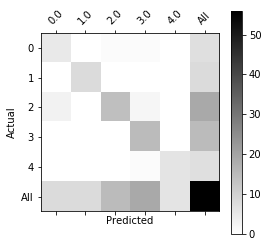

In [16]:
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

In [23]:
sent = np.array(["I told you not to do that thing", "I love you", "I am mad at you", "i am very cheerful"])
pred = predict1(sent, W, b, word_to_vec_map)

print_predictions(sent, pred)

I told you not to do that thing [3.]
I love you [0.]
I am mad at you [3.]
i am very cheerful [2.]

I told you not to do that thing 😞
I love you ❤
I am mad at you 😞
i am very cheerful 😄


## Predicting Emojis for a sentence using LSTM

LSTM is Long-Short-Term-Memory. As the name suggests, it takes into account the previous memory of the sequential flow of the input (sentence in this case). Now, due to this memory property, LSTM can be used for Sentiment Analysis.

In [24]:
import numpy as np
# np.random.seed(0)
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

Using TensorFlow backend.


In [25]:
def sentences_to_indices(X, word_to_index, max_len):
    num_train = X.shape[0]
    
    X_indices = np.zeros((num_train, max_len))
    
    for i in range(num_train):
        words = X[i].split(' ')
        
        
        sentence_words = [word.lower().replace('\t', '') for word in words if word.replace('\t', '') != '']
        
        j = 0
        
        for w in sentence_words:
            X_indices[i, j] = word_to_index[w]
            j += 1
    
    return X_indices

In [26]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 24)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices = [[155345. 225122.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]]


In [27]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_len, emb_dim = len(word_to_index) + 1, 50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)
    embedding_layer.build((None,))
    
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [28]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):    
    sentence_indices = Input(shape=input_shape, dtype='int32')
    
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    embeddings = embedding_layer(sentence_indices)
    
    X = LSTM(256, return_sequences=True)(embeddings)
    X = Dropout(0.5)(X)

    X = LSTM(128, return_sequences=False)(X)
    X = Dropout(0.5)(X)

    X = Dense(24, activation=None)(X)
    X = Activation('softmax')(X)
    
    model = Model(inputs=[sentence_indices], outputs=X)
    
    return model

In [29]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 256)           314368    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3096      
__________

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 24)

In [32]:
model.fit(X_train_indices, Y_train_oh, epochs = 200, batch_size = 32, shuffle=True)

Epoch 1/200
315/315 [==============================] - 1s 5ms/step - loss: 2.5219 - acc: 0.2889
Epoch 2/200
315/315 [==============================] - 0s 1ms/step - loss: 1.8106 - acc: 0.3016
Epoch 3/200
315/315 [==============================] - 0s 1ms/step - loss: 1.7669 - acc: 0.2794
Epoch 4/200
315/315 [==============================] - 0s 1ms/step - loss: 1.6697 - acc: 0.2698
Epoch 5/200
315/315 [==============================] - 0s 1ms/step - loss: 1.5740 - acc: 0.3175
Epoch 6/200
315/315 [==============================] - 0s 1ms/step - loss: 1.4999 - acc: 0.3302
Epoch 7/200
315/315 [==============================] - 0s 1ms/step - loss: 1.3752 - acc: 0.4349
Epoch 8/200
315/315 [==============================] - 0s 1ms/step - loss: 1.1362 - acc: 0.5587
Epoch 9/200
315/315 [==============================] - 0s 1ms/step - loss: 0.9342 - acc: 0.5873
Epoch 10/200
315/315 [==============================] - 0s 1ms/step - loss: 0.7719 - acc: 0.6667
Epoch 11/200
315/315 [=================

315/315 [==============================] - 0s 1ms/step - loss: 7.9417e-04 - acc: 1.0000
Epoch 167/200
315/315 [==============================] - 0s 1ms/step - loss: 6.5244e-04 - acc: 1.0000
Epoch 168/200
315/315 [==============================] - 0s 1ms/step - loss: 5.9218e-04 - acc: 1.0000
Epoch 169/200
315/315 [==============================] - 0s 1ms/step - loss: 7.0320e-04 - acc: 1.0000
Epoch 170/200
315/315 [==============================] - 0s 1ms/step - loss: 7.5100e-04 - acc: 1.0000
Epoch 171/200
315/315 [==============================] - 0s 1ms/step - loss: 4.7427e-04 - acc: 1.0000
Epoch 172/200
315/315 [==============================] - 0s 1ms/step - loss: 5.1188e-04 - acc: 1.0000
Epoch 173/200
315/315 [==============================] - 0s 1ms/step - loss: 4.5980e-04 - acc: 1.0000
Epoch 174/200
315/315 [==============================] - 0s 1ms/step - loss: 4.7135e-04 - acc: 1.0000
Epoch 175/200
315/315 [==============================] - 0s 1ms/step - loss: 5.0460e-04 - acc: 1

In [33]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 24)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

56/56 [==============================] - 0s 4ms/step

Test accuracy =  0.8571428571428571


In [34]:
# Change the sentence below to see your prediction. Make sure all the words are in the Glove embeddings.  
x_test = np.array(['not feeling happy', 'i am hungry', 'I love you', 'i adore you', "funny lol", "lets play with a ball", "food is ready"])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)

# pred = np

# print(X_test_indices.shape)

# for i in range(len(x_test)):
#     print(x_test[i] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices[i]))))
    
pred = model.predict(X_test_indices)
for i in range(len(x_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
#     if(num != Y_test[i]):
    print('prediction: '+ x_test[i] + label_to_emoji(num).strip())

prediction: not feeling happy😞
prediction: i am hungry🍴
prediction: I love you❤
prediction: i adore you❤
prediction: funny lol😄
prediction: lets play with a ball⚾
prediction: food is ready🍴
